In [ ]:
from train_module import *

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow import keras

from tensorflow.keras.preprocessing import image

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers.experimental.preprocessing import StringLookup

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import cv2

import matplotlib.image as mpimg


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# from zipfile import ZipFile
# file_name = "/content/drive/MyDrive/Dataset/archive (3).zip"

# with ZipFile(file_name, 'r') as zip:
#   zip.extractall()
#   print('Done')

Done


In [ ]:
get_df()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,colorgroup
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual,9
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,8
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual,12
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual,14
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual,14
...,...,...,...,...,...,...,...,...,...
44417,12544,Women,Apparel,Topwear,Tshirts,Peach,Fall,Casual,11
44418,42234,Women,Apparel,Topwear,Tops,Blue,Summer,Casual,8
44419,17036,Men,Footwear,Footwear,Casual Shoes,White,Summer,Casual,13
44420,6461,Men,Footwear,Footwear,Flip Flops,Red,Summer,Casual,0


In [ ]:
styles = get_df()

styles["subCategory"].unique() # we can check by this code that we only have three subcategory now.

array(['Topwear', 'Bottomwear', 'Footwear'], dtype=object)

In [ ]:
le = LabelEncoder()
styles["subCategory"] = le.fit_transform(styles["subCategory"])
styles.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,colorgroup
0,15970,Men,Apparel,2,Shirts,Navy Blue,Fall,Casual,9
1,39386,Men,Apparel,0,Jeans,Blue,Summer,Casual,8
3,21379,Men,Apparel,0,Track Pants,Black,Fall,Casual,12
4,53759,Men,Apparel,2,Tshirts,Grey,Summer,Casual,14
5,1855,Men,Apparel,2,Tshirts,Grey,Summer,Casual,14


In [ ]:
le.classes_

array(['Bottomwear', 'Footwear', 'Topwear'], dtype=object)

In [ ]:
sub_train,sub_val,sub_test = make_input_xx(make_input_array_subcate(styles))

sub_model = building_model(80, 60)

sub_model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 images (InputLayer)         [(None, 80, 60, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 3, 2, 2048)        23587712  
                                                                 
 conv2d (Conv2D)             (None, 2, 1, 32)          262176    
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1024)              66560     
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                              

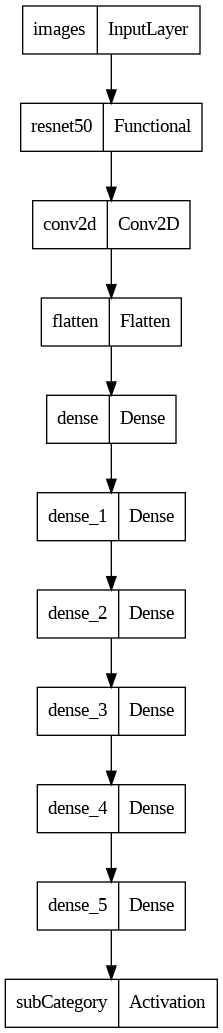

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(sub_model)

In [ ]:
sub_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

sub_history = sub_model.fit(sub_train,
                    epochs=3,
                    steps_per_epoch = 1000,
                    validation_data = sub_val)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1000/1000 [==============================] - 374s 369ms/step - loss: 0.1937 - accuracy: 0.9585 - val_loss: 0.1066 - val_accuracy: 0.9890
Epoch 2/3
1000/1000 [==============================] - 321s 322ms/step - loss: 0.1616 - accuracy: 0.9740 - val_loss: 0.1241 - val_accuracy: 0.9760
Epoch 3/3
1000/1000 [==============================] - 362s 362ms/step - loss: 0.0837 - accuracy: 0.9840 - val_loss: 0.2282 - val_accuracy: 0.9655


In [ ]:
sub_model.save("/content/drive/MyDrive/models/bottom_model")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test_model = tf.keras.models.load_model("/content/drive/MyDrive/models/bottom_model")
test_model.evaluate(sub_test)

2727/2727 [==============================] - 251s 90ms/step - loss: 0.2700 - accuracy: 0.9637


[0.2699986696243286, 0.9636896848678589]

In [ ]:
top_df = get_234_df("Topwear")
bottom_df = get_234_df("Bottomwear")
foot_df = get_234_df("Footwear")

In [ ]:
top_df,top_art,top_gen,top_base,top_sea,top_usage = my_le(top_df)
bottom_df,bottom_art,bottom_gen,bottom_base,bottom_sea,bottom_usage = my_le(bottom_df)
foot_df,foot_art,foot_gen,foot_base,foot_sea,foot_usage = my_le(foot_df)

In [ ]:
foot_usage.classes_

array(['Casual', 'Ethnic', 'Formal', 'Party', 'Smart Casual', 'Sports'],
      dtype=object)

In [ ]:
top_base_model = build_model(80,60,top_art,top_gen,top_base,top_sea,top_usage)
bottom_base_model = build_model(80,60,bottom_art,bottom_gen,bottom_base,bottom_sea,bottom_usage)
foot_base_model = build_model(80,60,foot_art,foot_gen,foot_base,foot_sea,foot_usage)

In [ ]:
top_train, top_val, top_test = make_input_xx(make_input_array_2(top_df))
bottom_train, bottom_val, bottom_test = make_input_xx(make_input_array_2(bottom_df))
foot_train, foot_val, foot_test = make_input_xx(make_input_array_2(foot_df))

In [ ]:
top_base_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
bottom_base_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
foot_base_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
top_history = top_base_model.fit(top_train,
                    epochs=6,
                    steps_per_epoch = 300,
                    validation_data = top_val)

Epoch 1/6


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


300/300 [==============================] - 269s 861ms/step - loss: 6.9949 - articleType_loss: 1.7747 - gender_loss: 0.6911 - baseColour_loss: 2.5281 - season_loss: 1.0121 - usage_loss: 0.9889 - articleType_accuracy: 0.5167 - gender_accuracy: 0.7583 - baseColour_accuracy: 0.2383 - season_accuracy: 0.5100 - usage_accuracy: 0.7133 - val_loss: 5.6242 - val_articleType_loss: 1.2993 - val_gender_loss: 0.4598 - val_baseColour_loss: 2.2883 - val_season_loss: 0.8418 - val_usage_loss: 0.7350 - val_articleType_accuracy: 0.5660 - val_gender_accuracy: 0.8492 - val_baseColour_accuracy: 0.2559 - val_season_accuracy: 0.5988 - val_usage_accuracy: 0.7572
Epoch 2/6
300/300 [==============================] - 231s 772ms/step - loss: 5.8490 - articleType_loss: 1.3913 - gender_loss: 0.5191 - baseColour_loss: 2.2533 - season_loss: 0.9104 - usage_loss: 0.7748 - articleType_accuracy: 0.6000 - gender_accuracy: 0.8100 - baseColour_accuracy: 0.2600 - season_accuracy: 0.5317 - usage_accuracy: 0.7767 - val_loss: 4.9

In [ ]:
top_base_model.evaluate(top_test)

1539/1539 [==============================] - 141s 90ms/step - loss: 4.6741 - articleType_loss: 0.8925 - gender_loss: 0.3157 - baseColour_loss: 2.1539 - season_loss: 0.7664 - usage_loss: 0.5455 - articleType_accuracy: 0.7190 - gender_accuracy: 0.8902 - baseColour_accuracy: 0.3970 - season_accuracy: 0.6417 - usage_accuracy: 0.8041


[4.674066066741943,
 0.8924999833106995,
 0.3157328963279724,
 2.153855085372925,
 0.7664276957511902,
 0.5455489754676819,
 0.7189733386039734,
 0.890188455581665,
 0.39701104164123535,
 0.6416504383087158,
 0.8040935397148132]

In [ ]:
top_base_model.save("/content/drive/MyDrive/models/top_model")

In [ ]:
bottom_history = bottom_base_model.fit(bottom_train,
                    epochs=15,
                    steps_per_epoch = 50,
                    validation_data = bottom_val)

Epoch 1/15
50/50 [==============================] - 59s 1s/step - loss: 5.1039 - articleType_loss: 1.2216 - gender_loss: 0.4127 - baseColour_loss: 1.9068 - season_loss: 0.9033 - usage_loss: 0.6594 - articleType_accuracy: 0.6200 - gender_accuracy: 0.8200 - baseColour_accuracy: 0.4200 - season_accuracy: 0.5300 - usage_accuracy: 0.7800 - val_loss: 5.4996 - val_articleType_loss: 1.3432 - val_gender_loss: 0.7117 - val_baseColour_loss: 1.8474 - val_season_loss: 0.8610 - val_usage_loss: 0.7363 - val_articleType_accuracy: 0.5754 - val_gender_accuracy: 0.7169 - val_baseColour_accuracy: 0.3948 - val_season_accuracy: 0.5773 - val_usage_accuracy: 0.6909
Epoch 2/15
50/50 [==============================] - 61s 1s/step - loss: 5.6741 - articleType_loss: 1.4896 - gender_loss: 0.5553 - baseColour_loss: 2.0282 - season_loss: 0.9043 - usage_loss: 0.6967 - articleType_accuracy: 0.5200 - gender_accuracy: 0.8200 - baseColour_accuracy: 0.4200 - season_accuracy: 0.6100 - usage_accuracy: 0.6900 - val_loss: 5.1

In [ ]:
bottom_base_model.evaluate(bottom_test)

269/269 [==============================] - 24s 87ms/step - loss: 4.9572 - articleType_loss: 1.2054 - gender_loss: 0.4725 - baseColour_loss: 1.6883 - season_loss: 0.8882 - usage_loss: 0.7028 - articleType_accuracy: 0.5996 - gender_accuracy: 0.8212 - baseColour_accuracy: 0.4413 - season_accuracy: 0.5959 - usage_accuracy: 0.7300


[4.9572296142578125,
 1.205366611480713,
 0.4724755883216858,
 1.6883325576782227,
 0.8882486820220947,
 0.7028047442436218,
 0.5996275544166565,
 0.8212290406227112,
 0.44134077429771423,
 0.5959031581878662,
 0.7299813628196716]

In [ ]:
bottom_base_model.save("/content/drive/MyDrive/models/bottom_model")

In [ ]:
foot_history = foot_base_model.fit(foot_train,
                    epochs=3,
                    steps_per_epoch = 1200,
                    validation_data = foot_val)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1200/1200 [==============================] - 576s 467ms/step - loss: 5.8889 - articleType_loss: 1.4221 - gender_loss: 0.7323 - baseColour_loss: 1.8428 - season_loss: 1.1568 - usage_loss: 0.7350 - articleType_accuracy: 0.4779 - gender_accuracy: 0.7733 - baseColour_accuracy: 0.4308 - season_accuracy: 0.4879 - usage_accuracy: 0.7271 - val_loss: 4.8491 - val_articleType_loss: 1.0525 - val_gender_loss: 0.6224 - val_baseColour_loss: 1.5796 - val_season_loss: 1.0550 - val_usage_loss: 0.5396 - val_articleType_accuracy: 0.6009 - val_gender_accuracy: 0.8070 - val_baseColour_accuracy: 0.4867 - val_season_accuracy: 0.5334 - val_usage_accuracy: 0.8075
Epoch 2/3
1200/1200 [==============================] - 550s 458ms/step - loss: 4.8937 - articleType_loss: 1.0441 - gender_loss: 0.6184 - baseColour_loss: 1.5895 - season_loss: 1.1141 - usage_loss: 0.5276 - articleType_accuracy: 0.6108 - gender_accuracy: 0.7950 - baseColour_accuracy: 0.4733 - season_accuracy: 0.5096 - usage_accuracy: 0.7983 - val_loss:

1200/1200 [==============================] - 227s 189ms/step - loss: 4.5978 - articleType_loss: 0.9137 - gender_loss: 0.5663 - baseColour_loss: 1.5334 - season_loss: 1.0482 - usage_loss: 0.5362 - articleType_accuracy: 0.6560 - gender_accuracy: 0.8189 - baseColour_accuracy: 0.5195 - season_accuracy: 0.5543 - usage_accuracy: 0.8203 - val_loss: 4.6241 - val_articleType_loss: 0.9763 - val_gender_loss: 0.5951 - val_baseColour_loss: 1.5336 - val_season_loss: 1.0817 - val_usage_loss: 0.4375 - val_articleType_accuracy: 0.6482 - val_gender_accuracy: 0.7890 - val_baseColour_accuracy: 0.5133 - val_season_accuracy: 0.5264 - val_usage_accuracy: 0.8380


In [ ]:
foot_base_model.evaluate(foot_test)

920/920 [==============================] - 85s 90ms/step - loss: 4.5608 - articleType_loss: 0.9243 - gender_loss: 0.5855 - baseColour_loss: 1.5785 - season_loss: 1.0565 - usage_loss: 0.4159 - articleType_accuracy: 0.6875 - gender_accuracy: 0.7913 - baseColour_accuracy: 0.4853 - season_accuracy: 0.5332 - usage_accuracy: 0.8576


[4.560804843902588,
 0.924313485622406,
 0.5855086445808411,
 1.578498125076294,
 1.056542992591858,
 0.41593608260154724,
 0.6875,
 0.791304349899292,
 0.4853260815143585,
 0.533152163028717,
 0.8576086759567261]

In [ ]:
foot_base_model.save("/content/drive/MyDrive/models/foot_model")